https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html#getting-started

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
plt.rcParams['figure.figsize'] = [20, 5]

Checkerboard pattern:
 [[ 1 -1]
 [-1  1]]


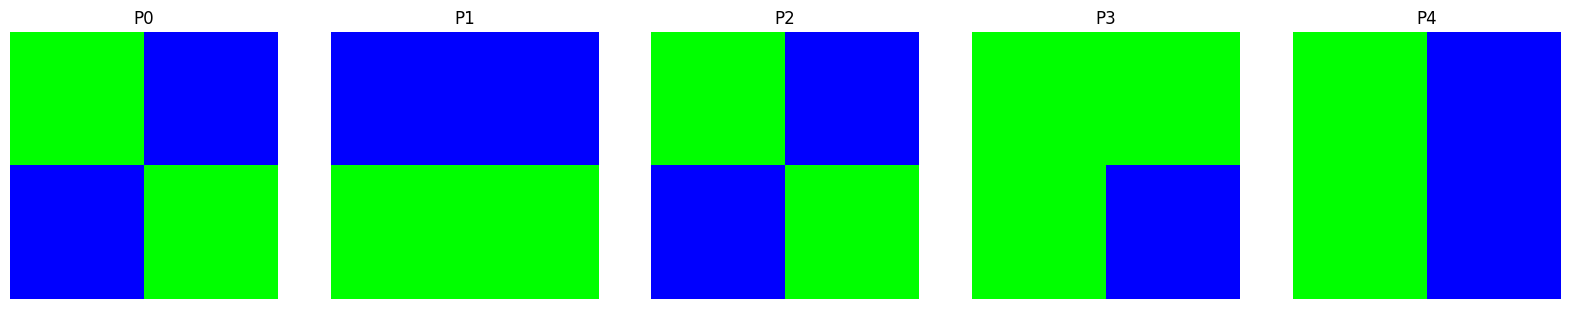

Network weights:
 [[ 0.   -0.25 -0.25 -0.25]
 [-0.25  0.    0.25 -0.75]
 [-0.25  0.25  0.   -0.75]
 [-0.25 -0.75 -0.75  0.  ]]


In [ ]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
print("Checkerboard pattern:\n", checkerboard)
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=1, on_probability=0.5))

plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
# overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
# plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# check the weights of the network
# plot_tools.plot_network_weights(hopfield_net)

print("Network weights:\n", hopfield_net.weights)


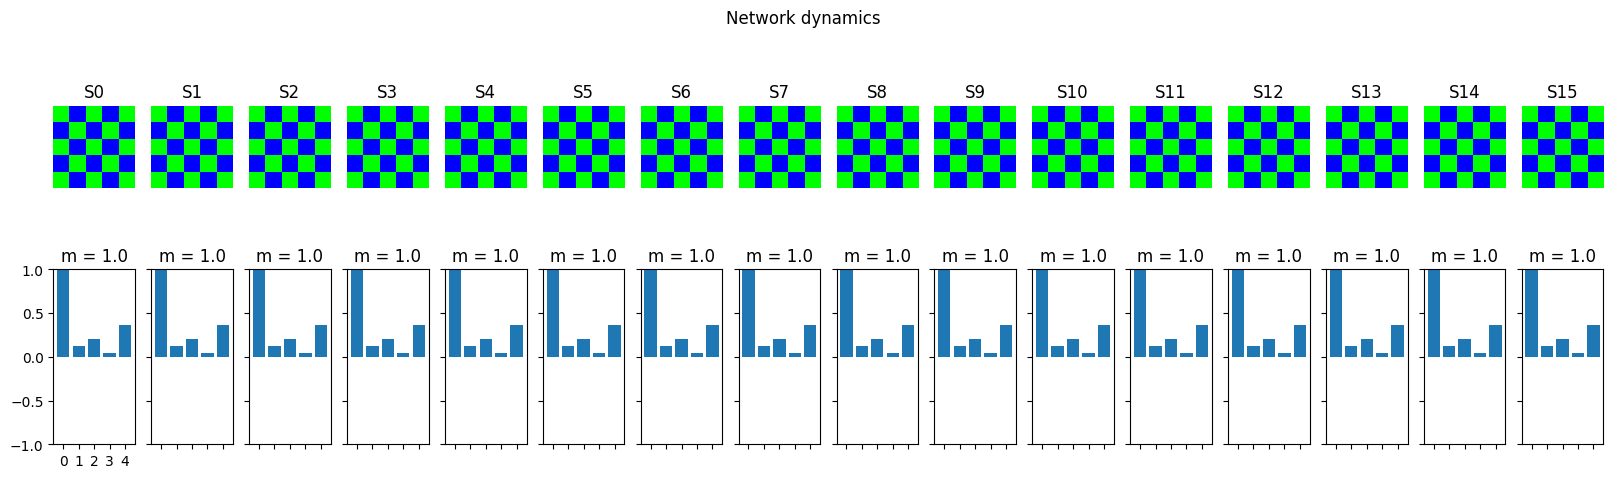

In [3]:
## RETRIEVAL
# # create a noisy version of a pattern and use that to initialize the network
initial_index = 0
noisy_init_state = pattern_tools.flip_n(pattern_list[initial_index], nr_of_flips =0)
hopfield_net.set_state_from_pattern(noisy_init_state)

# # from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=15)

# # each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# # plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=initial_index, suptitle="Network dynamics")

to try:
- similar exercice with patterns of N x M size 
- different update rules